In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dataset Description
* Age : Age of the patient
* Sex : Sex of the patient
    - 1 = male
    - 0 = female
* cp : Chest Pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol: cholesterol in mg/dl fetched via BMI sensor
* fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true
    - 0 = false
* rest_ecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina
    - 1 = yes
    - 0 = no
* old peak: ST depression induced by exercise relative to rest
* slp: the slope of the peak exercise ST segment
    - 0 = unsloping
    - 1 = flat
    - 2 = downsloping
* caa: number of major vessels (0-3)
* thall : thalassemia
    - 0 = null
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
* output: diagnosis of heart disease (angiographic disease status)
    - 0: < 50% diameter narrowing. less chance of heart disease
    - 1: > 50% diameter narrowing. more chance of heart disease

# Ron Briggs Analysis

In [2]:
# Load the data into a Pandas DataFrame
df_heartattack = pd.read_csv(
    "Data_csv/heart.csv")

# Display sample data
df_heartattack.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Generate summary statistics
df_heartattack.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Plot your data to see what's in your DataFrame
df_heartattack.hvplot.line(
    width=800,
    height=400,
    rot=90
)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [6]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(df_heartattack)

# Copy the crypto names from the original data
crypto_names = df_heartattack.index
# Set the coinid column as index
df_scaled_heartattack = pd.DataFrame(scaled_data, columns=df_heartattack.columns, index=crypto_names)

# Display sample data
df_scaled_heartattack.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873,0.914529
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922,0.914529
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029,0.914529
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029,0.914529
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922,0.914529


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
inertia = []

In [8]:
# Create an empty list to store the inertia values
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_scaled_heartattack)
    inertia.append(k_model.inertia_)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 2 - this point has the sharpest bend

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled_heartattack)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = model.predict(df_scaled_heartattack)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0]


In [14]:
# Create a copy of the DataFrame
cluster_label_predictions_df = df_scaled_heartattack.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
cluster_label_predictions_df['predicted cluster'] = cluster_labels

# Display sample data
cluster_label_predictions_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predicted cluster
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529,0
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529,0
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529,0
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529,0
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529,0


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

cluster_label_predictions_df.hvplot.scatter(
    x="age",
    y="chol",
    c="predicted cluster",  # Color by the predicted clusters
    cmap=["orange", "red", "blue", "green"],  
    title="Heart Attack Clusters",
    xlabel="Age",
    ylabel="Chol",
    hover_cols=["predicted cluster", "coin_id"],  # Display predicted cluster and coin_id on hover
)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Scatter   [age]   (chol,predicted cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=6`.
pca = PCA(n_components=6)

In [18]:
# Use the PCA model with fit_transform to reduce to six principal components.
pca_data = pca.fit_transform(df_scaled_heartattack)
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=df_scaled_heartattack.index)

# View the first five rows of the DataFrame.
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.051739  2.624022  0.990054  3.479328  0.362773  1.695836
1 -0.817441 -0.730375 -0.235928  2.767545  2.258404 -0.808414
2 -2.057599 -0.039098 -0.519839  0.081198  0.860416  0.752783
3 -1.903043 -0.596701  0.076204 -0.082624 -0.235141 -0.500292
4 -0.768371  0.412545 -2.187455 -1.988510  0.017448 -0.074219


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.23581966 0.11229748 0.08800207 0.08618849 0.07300207 0.06929774]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.435 - 3 components
            0.663 - 6 components

In [20]:
# Create a new DataFrame with the PCA data
df_pca_data = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=df_scaled_heartattack.index)

# Copy the crypto names from the original data
crypto_names = df_heartattack.index

# Set the '***' column as the index
#df_pca_data.index.name = '***'

# Display sample data
df_pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.051739,2.624022,0.990054,3.479328,0.362773,1.695836
1,-0.817441,-0.730375,-0.235928,2.767545,2.258404,-0.808414
2,-2.057599,-0.039098,-0.519839,0.081198,0.860416,0.752783
3,-1.903043,-0.596701,0.076204,-0.082624,-0.235141,-0.500292
4,-0.768371,0.412545,-2.187455,-1.988510,0.017448,-0.074219


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
inertia_pca = []

In [22]:
# Create an empty list to store the inertia values
k_pca = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    k_model_pca = KMeans(n_clusters=i, random_state=1)
    k_model_pca.fit(df_pca_data)  # Use the PCA-transformed data
    inertia_pca.append(k_model_pca.inertia_)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for K-Means (PCA Data)',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    grid=True,
    height=400,
    width=600,
    line_color='blue',
)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=2, random_state=1)

In [26]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_pca_data)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=1)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = model_pca.predict(df_pca_data)
# Print the resulting array of cluster values.
print(cluster_labels_pca)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0]


In [28]:
# Create a copy of the DataFrame with the PCA data
cluster_label_predictions_pca_df = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
cluster_label_predictions_pca_df['predicted cluster'] = cluster_labels_pca

# Display sample data
print(cluster_label_predictions_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6  \
0 -0.051739  2.624022  0.990054  3.479328  0.362773  1.695836   
1 -0.817441 -0.730375 -0.235928  2.767545  2.258404 -0.808414   
2 -2.057599 -0.039098 -0.519839  0.081198  0.860416  0.752783   
3 -1.903043 -0.596701  0.076204 -0.082624 -0.235141 -0.500292   
4 -0.768371  0.412545 -2.187455 -1.988510  0.017448 -0.074219   

   predicted cluster  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

cluster_label_predictions_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted cluster",  # Color by the predicted clusters
    cmap=["orange", "red", "blue", "green"],  
    title="Clusters (PCA Data)",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    hover_cols=["predicted cluster"],  # Display predicted cluster and coin_id on hover
    width=600,
    height=400,
)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Scatter   [PC1]   (PC2,predicted cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
composite_plot = df_elbow + df_elbow_pca
composite_plot

,k,inertia
0,2,7061.265143
1,4,5552.507151
2,6,5062.744517
3,8,4700.974311
4,10,4423.832434
5,12,4210.512233
6,14,4011.777811
7,16,3900.050811
8,18,3762.649718
9,20,3624.778276


In [31]:
composite_plot.hvplot.line(
    x='k',
    y='inertia',
    title='Composite Plot',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    grid=True,
    height=400,
    width=600,
    line_color='blue',
)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [k]   (inertia)

In [32]:
# Create a composite plot to contrast the clusters of the original data and the PCA data

composite_plot2 = cluster_label_predictions_df.hvplot.scatter(
    x="sex",
    y="chol",
    c="predicted cluster",  # Color by the predicted clusters of the original data
    cmap=["orange", "red", "blue", "green"],
    title="Clusters (Original Data)",
    xlabel="sex",
    ylabel="chol",
    hover_cols=["predicted cluster", "coin_id"],  # Display predicted cluster and coin_id on hover
    width=600,
    height=400,
) + cluster_label_predictions_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted cluster",  # Color by the predicted clusters of the PCA data
    cmap=["orange", "red", "blue", "green"],
    title="Clusters (PCA Data)",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    hover_cols=["predicted cluster", "coin_id"],  # Display predicted cluster and coin_id on hover
    width=600,
    height=400,
)

# Show the composite plot
composite_plot2

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

:Layout
   .Scatter.I  :Scatter   [sex]   (chol,predicted cluster)
   .Scatter.II :Scatter   [PC1]   (PC2,predicted cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The resulting cluster is smaller and more concentrated. The outliers are more distinct and there is less noise. The trade-offs include a loss of data and the choice of PCA components are subjective.

# Dhawanpreet's Logistic Regression Model

In [33]:
# import modules
import pandas as pd
import os
import sqlite3
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [34]:
csv_file_path ="Data_csv/heart.csv"

In [35]:
def create_sqlite_database(csv_file_path, db_file_path, table_name):
    # Read data from the CSV file using pandas
    df = pd.read_csv(csv_file_path)

    # Connect to the SQLite database or create a new one if it doesn't exist
    conn = sqlite3.connect(db_file_path)

    # Write the DataFrame to the SQLite database as a new table
    df.to_sql(table_name, conn, if_exists='replace', index=False)

    # Close the connection
    conn.close()

if __name__ == "__main__":
    # Get the absolute path of the current directory and the Resources directory
    current_dir = os.path.dirname(os.path.abspath(__name__))
    resources_dir = os.path.join(current_dir, "Data_csv") #path where your file is

    # File paths for CSV and SQLite database
    csv_file_path = os.path.join(resources_dir, "heart.csv") # file name which you want to read 
    db_file_path = os.path.join(current_dir, "Heart.sqlite") # file name give it which you are creating
    table_name = "table1" # name of the table 

    create_sqlite_database(csv_file_path, db_file_path, table_name)

In [36]:
#Establish connection to SQLite Database

conn = sqlite3.connect(db_file_path)

query = "SELECT * FROM table1"

# cursor.execute(query)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

# Read data from the database and store it in a DataFrame
heart_df = pd.read_sql_query(query, conn)
heart_df.head()

conn.close()


In [37]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
# checking if the data is balanced or not
heart_df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [39]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = heart_df['output']

# The X variable should include all features except the target
X = heart_df.drop(columns=['output'])


In [40]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1 ,stratify=y)

In [41]:

# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

c:\Users\dpitc\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test)

In [43]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score_of_model =balanced_accuracy_score(y_test,testing_predictions)
balanced_accuracy_score_of_model

0.851219512195122

In [44]:
# Generate a confusion matrix for the model
testing_matrix = confusion_matrix(y_test,testing_predictions)

# Print the confusion matrix for the training data
print(testing_matrix)

[[28  7]
 [ 4 37]]


In [45]:
# Print the classification report for the model
logistic_report = classification_report(y_test, testing_predictions)
print(logistic_report)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



# Leif's Random Forest Classifier Model

In [46]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [47]:
# Loading data
df_heart = pd.read_csv("Data_csv/heart.csv")
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
#Checking the balance
df_heart["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [49]:
# Define features set
X = df_heart.copy()
X.drop("output", axis=1, inplace=True)

In [50]:
# Define target vector
y = df_heart["output"]

In [51]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [52]:
# Creating StandardScaler instance; Fitting Standard Scaler; Scaling the data
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
# Create a random forest classifier; Fit the model; Make predictions using the testing data
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

rf_model = rf_model.fit(X_train_scaled, y_train)
 
predictions = rf_model.predict(X_test_scaled)

In [54]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [55]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,27,12
Actual 1,3,34


Accuracy Score : 0.8026315789473685
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.74      0.92      0.82        37

    accuracy                           0.80        76
   macro avg       0.82      0.81      0.80        76
weighted avg       0.82      0.80      0.80        76



# Huma's SVC Model
- Likelihood of Heartattack Model Prediction Training with SVC Linear

In [56]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import sqlite3

# Imports for saving model as pickle file (.pkl format)
import pickle
import joblib



In [57]:
# Create SQLite database connection, 
# retrieving file from Sqlite_Heart_Database Folder
conn = sqlite3.connect(db_file_path)

# Creating and reading the DataFrame using the data in SQL 
query = "SELECT * FROM table_1"
df = pd.read_sql_query(query, conn)

# Closing the database connection
conn.close()

# Review the dataframe
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Get the target variables, here it is the liklihood of an heartattack, which is
# decribed in column, "output" 
y = df["output"]
class_names = ["No Heart Disease", "Heart Disease"]

In [59]:
# Get the features, by dropping the target from the original dataframe 
X = df.drop("output", axis=1)
feature_names = X.columns

In [60]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

SVC Linear Model Setup and Training

In [61]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.868


In [63]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions, target_names=class_names)
print(report)

                  precision    recall  f1-score   support

No Heart Disease       0.88      0.83      0.85        35
   Heart Disease       0.86      0.90      0.88        41

        accuracy                           0.87        76
       macro avg       0.87      0.87      0.87        76
    weighted avg       0.87      0.87      0.87        76



Make Predictions

In [64]:
# Compare the Predicted and Actual Values of the Model 
actual_data_predicted = pd.DataFrame({"Prediction": predictions, "Actual": y_test})

actual_data_predicted.head(25)

,Prediction,Actual
179,0,0
228,1,0
111,1,1
246,0,0
60,1,1
9,1,1
119,1,1
223,0,0
268,0,0
33,1,1


In [65]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

print(report)

Test Acc: 0.868
                  precision    recall  f1-score   support

No Heart Disease       0.88      0.83      0.85        35
   Heart Disease       0.86      0.90      0.88        41

        accuracy                           0.87        76
       macro avg       0.87      0.87      0.87        76
    weighted avg       0.87      0.87      0.87        76



Save Trained Model in Pickle format ready for Deploment

In [66]:

filename = 'svc_finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [67]:
# Without configuration
model.opimizer=None
model.compiled_loss= None
model.compiled_metrics = None
joblib.dump(model,"final_prediction_model.h5")

['final_prediction_model.h5']

Load Trained Model

In [68]:
# load the Svc linear trained model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.868421052631579


# Deepika's Neural Network Model

In [69]:
# import dependencies
import os
import pandas as pd 
import sqlite3
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [70]:
# Suppress all warnings
warnings.filterwarnings("ignore")

def create_sqlite_database(csv_file_path, db_file_path, table_name):
    # Read data from the CSV file using pandas
    
    #csv_file_path=("../Data.csv/heart.csv")
    df = pd.read_csv(csv_file_path)


    # Connect to the SQLite database or create a new one if it doesn't exist
    #db_file_path=("../Data.csv/heart.sqlite")
    conn = sqlite3.connect(db_file_path)


    # Write the DataFrame to the SQLite database as a new table
    df.to_sql(table_name, conn, if_exists='replace', index=False)

    #table_name = "table_1"
    # Close the connection
    conn.close()


if __name__ == "__main__":
    # Get the absolute path of the current directory and the Resources directory
    current_dir = os.path.dirname(os.path.abspath(__name__))
    resources_dir = os.path.join(current_dir, "Data_csv")


    # File paths for CSV and SQLite database
    csv_file_path = os.path.join(resources_dir, "heart.csv")
    db_file_path = os.path.join(current_dir, "Heart.sqlite")
    table_name1 = "table_1"
    

    create_sqlite_database(csv_file_path, db_file_path, table_name1)
  


In [71]:
#Establish connection to SQLite Database

conn = sqlite3.connect(db_file_path)

query = "SELECT * FROM table_1"

# cursor.execute(query)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

# Read data from the database and store it in a DataFrame
heart_df = pd.read_sql_query(query, conn)
heart_df.head()

conn.close()


In [72]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
corr=heart_df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


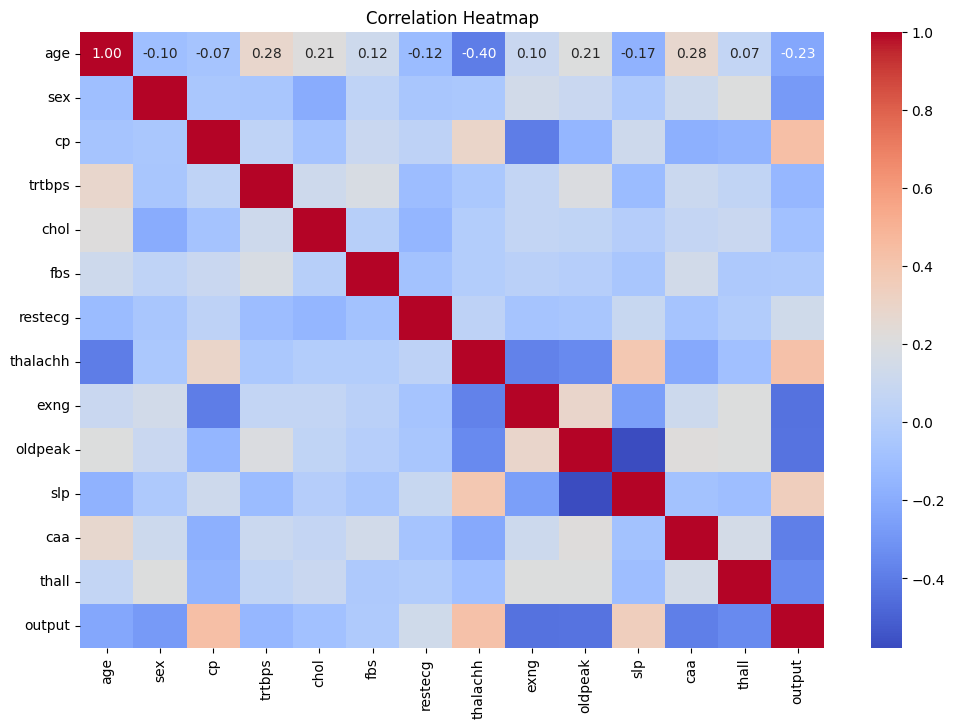

In [74]:
# Correlation Heatmap between the features
corr_matrix = heart_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Correlation Anaylsis
- Age and Maximum Heart Rate (thalachh): Negative correlation (-0.40) indicates that as age increases, maximum heart rate tends to decrease.
- Sex and Heart Disease (output): Negative correlation (-0.28) suggests that females may have a lower likelihood of heart disease compared to males.
- Chest Pain Type (cp) and Heart Disease (output): Positive correlation (0.43) suggests that certain chest pain types may be associated with a higher likelihood of heart disease.
- Age and Resting Blood Pressure (trtbps): Positive correlation (0.28) implies that as age increases, resting blood pressure tends to increase.
- Age and Number of Major Vessels (caa): Positive correlation (0.28) indicates that older individuals may have more major vessels with potential blockages.
- Maximum Heart Rate (thalachh) and Heart Disease (output): Positive correlation (0.42) suggests that a higher maximum heart rate may be linked to heart disease.
- Exercise-Induced Angina (exng) and Heart Disease (output): Negative correlation (-0.44) implies that angina during exercise may be associated with a lower likelihood of heart disease.
- ST Depression (oldpeak) and Number of Major Vessels (caa): Strong negative correlation (-0.58) suggests that as ST depression increases, the number of major vessels tends to decrease.
- Number of Vessels (caa) and Thallium Stress Test (thall): Negative correlation (-0.39) indicates that as the number of major vessels increases, thallium stress test results tend to decrease.
- Chest Pain Type (cp) and Slope of the ST Segment (slp): Positive correlation (0.35) suggests a potential relationship between chest pain type and the slope of the ST segment.

In [75]:
# Remove output from features data
y = heart_df.output.values
X = heart_df.drop(columns="output").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [76]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [77]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(ha):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = ha.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=ha.Int('first_units',
        min_value=1,
        max_value=64,
        step=2), activation=activation, input_dim=13))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(ha.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=ha.Int('units_' + str(i),
            min_value=1,
            max_value=64,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [78]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [79]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=1,validation_data=(X_test_scaled,y_test))

Trial 508 Complete [00h 00m 08s]
val_accuracy: 0.8684210777282715

Best val_accuracy So Far: 0.8684210777282715
Total elapsed time: 00h 05m 17s
INFO:tensorflow:Oracle triggered exit


In [80]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 3,
 'num_layers': 2,
 'units_0': 37,
 'units_1': 59,
 'units_2': 5,
 'units_3': 63,
 'units_4': 15,
 'units_5': 59,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [81]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.4431 - accuracy: 0.8684 - 344ms/epoch - 115ms/step
Loss: 0.4431040287017822, Accuracy: 0.8684210777282715


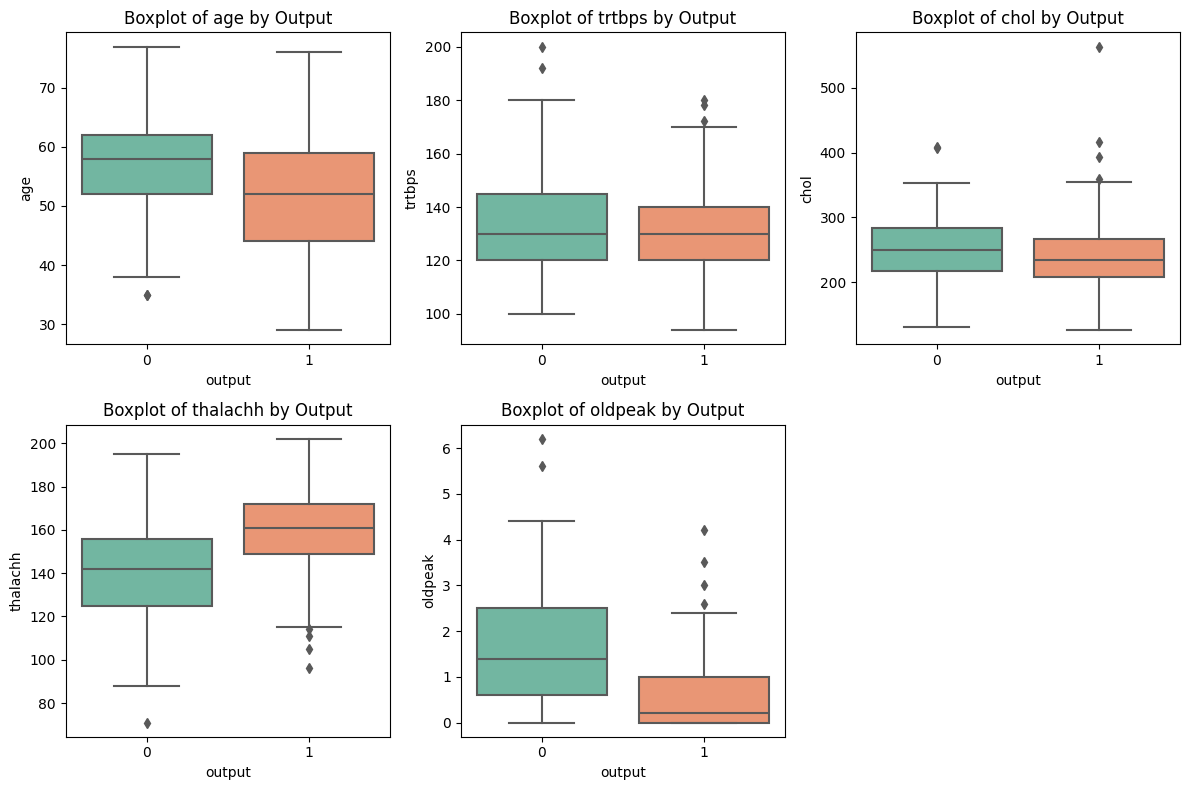

In [82]:
# Boxplot for Numeric Variables
numeric_variables = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
plt.figure(figsize=(12, 8))
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_df, x="output", y=var, palette="Set2")
    plt.title(f"Boxplot of {var} by Output")
plt.tight_layout()
plt.show()

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall output  
0    0      1      1  
1    0      2      1  
2    0      2      1  
3    0      2      1  
4    0      2      1  


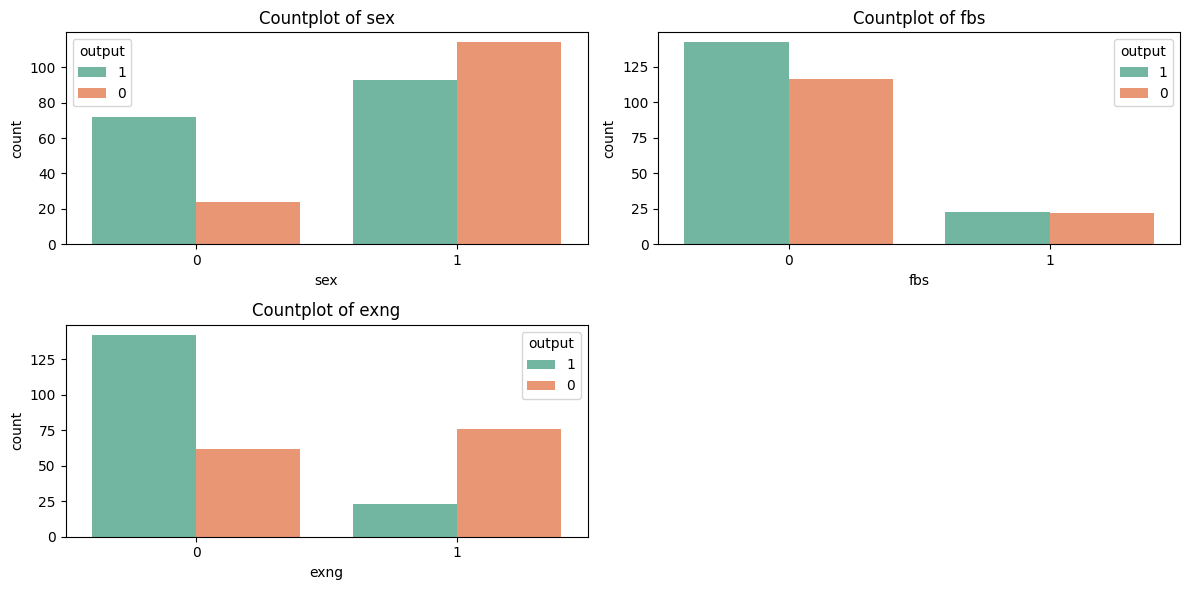

In [83]:
# Countplot for Binary Variables
# Convert the "output" column to a categorical data type
heart_df["output"] = heart_df["output"].astype(str)

# Explore the first few rows of the dataset
print(heart_df.head())

# Define binary variables
binary_variables = ["sex", "fbs", "exng"]

# Create countplots for binary variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(binary_variables, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=heart_df, x=var, hue="output", palette="Set2")
    plt.title(f"Countplot of {var}")
plt.tight_layout()
plt.show()


In [84]:
## Save the entire model to a HDF5 file.
best_model.save("dp_model.h5")

In [85]:
!pip install numpy
import numpy as np

In [86]:
from keras.models import load_model

model=load_model("dp_model.h5")

input_values=(44,1,0,120,169,0,1,144,1,2.8,0,0,1)

#Change the input data to a numpy array from tuple

input_value_numpy=np.asarray(input_values)

#reshape the numpy array 

input_valuesz_reshaped=input_value_numpy.reshape(1,-1)

prediction=model.predict(input_valuesz_reshaped)



1/1 [==============================] - 0s 105ms/step
